# Outplut Visualisation

In [51]:
import os
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error


## Load Prediction Data into a DataFrame

In [2]:
#functions that set the directory and are used to get access to output files
#dir_name is the full path name
def getFilesFromDirectory(dir_name,predict_prefix="prediction_"):
    '''
    Get the files where predictions are
    '''
    if(os.path.isdir(dir_name) == False):
        print("directory name in invalid")
        return []
    files = os.listdir(dir_name)
    out_files = [myfile for myfile in files if os.path.isfile(os.path.join(dir_name,myfile)) and 
                                               myfile.find(predict_prefix,0,len(myfile)) >= 0]
    return out_files

#dir_name is the full path name
def getFoldersFromDirectory(dir_name):
    '''
    Get the folders where the predictions are
    '''
    if(os.path.isdir(dir_name) == False):
        print("directory name in invalid")
        return []
    all_files = os.listdir(dir_name)
    out_dirs = [my_dir for my_dir in all_files if os.path.isdir(os.path.join(dir_name,my_dir))]
    return out_dirs

#integer to month, January is 1 and december is 12
def GetMonth(in_pred_file):
    '''
    Get the Month for each prediction
    '''
    strt_idx = (int)(in_pred_file.rfind('_'))+1
    stop_idx = (int)(in_pred_file.find('.'))
    int_month = (int)(in_pred_file[strt_idx:stop_idx])
    #print(int_month)
    if int_month<1 and int_month>12:
        print("Error:bad Input to GetMonth():")
        return ""
    month_dict = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    return month_dict[int_month-1]

def seeInValues():
    '''
    Clean the output file : get the actual & predicted value from each csv prediction file
    '''
    sum_of_actual = 0
    sum_of_predict = 0

    #Checking for one method_type
    for method_type in all_method_types[0:1]:

        method_type_dir = os.path.join(prediction_dir,method_type)
        #print(method_type+" extracting data.")

        all_crime_types = getFoldersFromDirectory(method_type_dir)
        print("#Crime Tpes: " + str(len(all_crime_types)))


        for crime_type in all_crime_types:

            sum_of_actual = 0
            sum_of_predict = 0
            crime_type_dir = os.path.join(method_type_dir,crime_type)
            predicted_files = getFilesFromDirectory(crime_type_dir)
            #rint(crime_type_dir)
            for pred_file in predicted_files:

                #print(pred_file)
                pred_file_dir = os.path.join(crime_type_dir,pred_file)
                data = (pd.read_csv(pred_file_dir,sep=' ',header=None))
                data.columns = ['Actual','Predicted']
                #print(data)
                sum_of_actual += data['Actual'].sum()
                sum_of_predict += data['Predicted'].sum()
            print(crime_type+":"+str(sum_of_actual) +":"+str(sum_of_predict))

In [14]:
#Clean and Load the Dataset to a Dataframe Predictions_df : Poly3, SVR3 

cwd = os.getcwd()
print(cwd)
prediction_dir = 'C:\\Users\\Meryem\\Desktop\\Crime Prediction Meryem\\Output' 

#To test
all_method_types = getFoldersFromDirectory(prediction_dir)
print(prediction_dir)
print(len(all_method_types))

crime_dirpath = os.path.join(prediction_dir,all_method_types[0])
all_crime_types = getFoldersFromDirectory(crime_dirpath)
#print(crime_dirpath)
#print(len(all_crime_types))

crime_pred_dirpath = os.path.join(crime_dirpath,all_crime_types[0])
all_predict_files = getFilesFromDirectory(crime_pred_dirpath)
#print(crime_pred_dirpath)
#print(all_predict_files)

#skeleton of the output that we want
Predictions_df = []
columnNames = ['Community_Num','Crime_Type','Date_Month','Method_type','Computed_Value']        
Predictions_df = pd.DataFrame(columns=columnNames)

#load allthe folders from the directory
all_method_types = getFoldersFromDirectory(prediction_dir)


for method_type in all_method_types:
    
    method_type_dir = os.path.join(prediction_dir,method_type)
    print(method_type+" extracting data.")
    all_crime_types = getFoldersFromDirectory(method_type_dir)
    #print(all_crime_types)
    
    for crime_type in all_crime_types:
        
        crime_type_dir = os.path.join(method_type_dir,crime_type)
        predicted_files = getFilesFromDirectory(crime_type_dir)
        #print(len(predicted_files))
        for pred_file in predicted_files:
            #print(pred_file)
            sum_of_actual = 0
            sum_of_predict = 0
            computed_val = 0
            pred_file_dir = os.path.join(crime_type_dir,pred_file)
            data = pd.read_csv(pred_file_dir,sep=' ',header=None)
            data.columns = ['Actual','Predicted']
            #find the month
            for comm_num,val in enumerate(data.iterrows()):

                if(val[1][1] < 0):
#                    data.set_value(comm_num,'Predicted',0)
                    val[1][1] = 0
                actual = val[1][0]
                predict = val[1][1]
                
#                 if(val[1][0]):
#                     computed_val = (val[1][1])/(val[1][0])   #predicted/actual
#                 else:
#                     computed_val = 1.0
#                computed_val = abs(predict-actual)/(1+actual)
                computed_val = (predict+1)/(1+actual)
            #computed_val = sqrt(mean_squared_error(data['Actual'],data['Predicted']))
                Predictions_df = Predictions_df.append({'Community_Num':str(comm_num),'Crime_Type':crime_type,
                                     'Date_Month':GetMonth(pred_file),'Method_type':method_type,
                                     'Computed_Value':(computed_val), 'Actual_value':(actual), 
                                     'Predicted_Value':(predict)},
                                           ignore_index=True)
print("All Done")

C:\Users\Meryem\Desktop\Chicago\CrimePrediction-master\Code\iPython
C:\Users\Meryem\Desktop\Crime Prediction Meryem\Output
2
Poly1 extracting data.
SVR1 extracting data.
All Done


In [4]:
# 91170 rows : 77 communities * 33 primary crime types * 12 months * 2 methods
Predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60984 entries, 0 to 60983
Data columns (total 5 columns):
Community_Num     60984 non-null object
Crime_Type        60984 non-null object
Date_Month        60984 non-null object
Method_type       60984 non-null object
Computed_Value    60984 non-null float64
dtypes: float64(1), object(4)
memory usage: 2.3+ MB


In [15]:
Predictions_df.head()

,Community_Num,Crime_Type,Date_Month,Method_type,Computed_Value,Actual_value,Predicted_Value
0,0,ARSON,Jan,Poly1,0.720164,1.0,0.440328
1,1,ARSON,Jan,Poly1,2.865760,0.0,1.865760
2,2,ARSON,Jan,Poly1,1.000000,0.0,0.000000
3,3,ARSON,Jan,Poly1,1.000000,0.0,0.000000
4,4,ARSON,Jan,Poly1,1.000000,0.0,0.000000


In [7]:
Predictions_df['Community_Num'].describe()

count     60984
unique       77
top          27
freq        792
Name: Community_Num, dtype: object

In [8]:
Predictions_df['Crime_Type'].describe()

count                                 60984
unique                                   33
top       CONCEALED CARRY LICENSE VIOLATION
freq                                   1848
Name: Crime_Type, dtype: object

In [9]:
Predictions_df['Method_type'].describe()

count     60984
unique        2
top        SVR1
freq      30492
Name: Method_type, dtype: object

In [10]:
Predictions_df['Date_Month'].describe()

count     60984
unique       12
top         Sep
freq       5082
Name: Date_Month, dtype: object

In [16]:
Predictions_df['Computed_Value'].describe()

count    60984.000000
mean         1.308251
std          1.863722
min          0.002392
25%          1.000000
50%          1.000000
75%          1.273667
max        156.999850
Name: Computed_Value, dtype: float64

In [19]:
Predictions_df['Actual_value'].describe()

count    60984.000000
mean         8.064574
std         23.472672
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max        450.000000
Name: Actual_value, dtype: float64

In [21]:
Predictions_df['Predicted_Value'].describe()

count    60984.000000
mean         9.912091
std         30.221761
min          0.000000
25%          0.000000
50%          0.257508
75%          6.192729
max       1157.955475
Name: Predicted_Value, dtype: float64

## Top 10 Crimes

In [72]:
#Compute Top 5 crimes according to "actual data"

#only 1 method : SVR
Predictions_df_svr = Predictions_df[Predictions_df.Method_type == 'SVR1']
Crimes_group_actual = Predictions_df_svr.groupby('Crime_Type').Actual_value.sum()
top_10_crimes_actual = Crimes_group.nlargest(n=10)

In [81]:
top_10_crimes_actual

Crime_Type
THEFT                  57319.0
BATTERY                48910.0
CRIMINAL DAMAGE        28671.0
NARCOTICS              23837.0
ASSAULT                17041.0
DECEPTIVE PRACTICE     15676.0
BURGLARY               13183.0
MOTOR VEHICLE THEFT    10070.0
ROBBERY                 9638.0
CRIMINAL TRESPASS       6400.0
Name: Actual_value, dtype: float64

In [87]:
Predictions_df_svr = Predictions_df[Predictions_df.Method_type == 'SVR1']
Crimes_group_svr = Predictions_df_svr.groupby('Crime_Type').Predicted_Value.sum()
top_10_crimes_svr = Crimes_group_svr.nlargest(n=10)

In [88]:
top_10_crimes_svr

Crime_Type
THEFT                  67230.621417
BATTERY                55715.727668
NARCOTICS              33708.386084
CRIMINAL DAMAGE        32492.673376
BURGLARY               19777.052929
ASSAULT                18616.936835
MOTOR VEHICLE THEFT    14054.446460
DECEPTIVE PRACTICE     13548.709671
ROBBERY                11991.308873
CRIMINAL TRESPASS       7950.013196
Name: Predicted_Value, dtype: float64

In [89]:
Predictions_df_svr = Predictions_df[Predictions_df.Method_type == 'Poly1']
Crimes_group_poly = Predictions_df_poly.groupby('Crime_Type').Predicted_Value.sum()
top_10_crimes_poly = Crimes_group_poly.nlargest(n=10)

In [90]:
top_10_crimes_poly

Crime_Type
THEFT                  67049.321249
BATTERY                55084.590540
NARCOTICS              35643.414671
CRIMINAL DAMAGE        34876.157414
BURGLARY               21358.211736
ASSAULT                20609.729569
DECEPTIVE PRACTICE     16516.526366
MOTOR VEHICLE THEFT    15189.386865
ROBBERY                12503.660611
CRIMINAL TRESPASS       9353.511152
Name: Predicted_Value, dtype: float64

## Comparing two methods : SVR & Polynomial Regression

Comparision of both methods' performances on the top 10 crimes. 

In [122]:
Predictions_df_error = Predictions_df.drop('Predicted_Value',1)
Predictions_df_error = Predictions_df_error.drop('Actual_value',1)

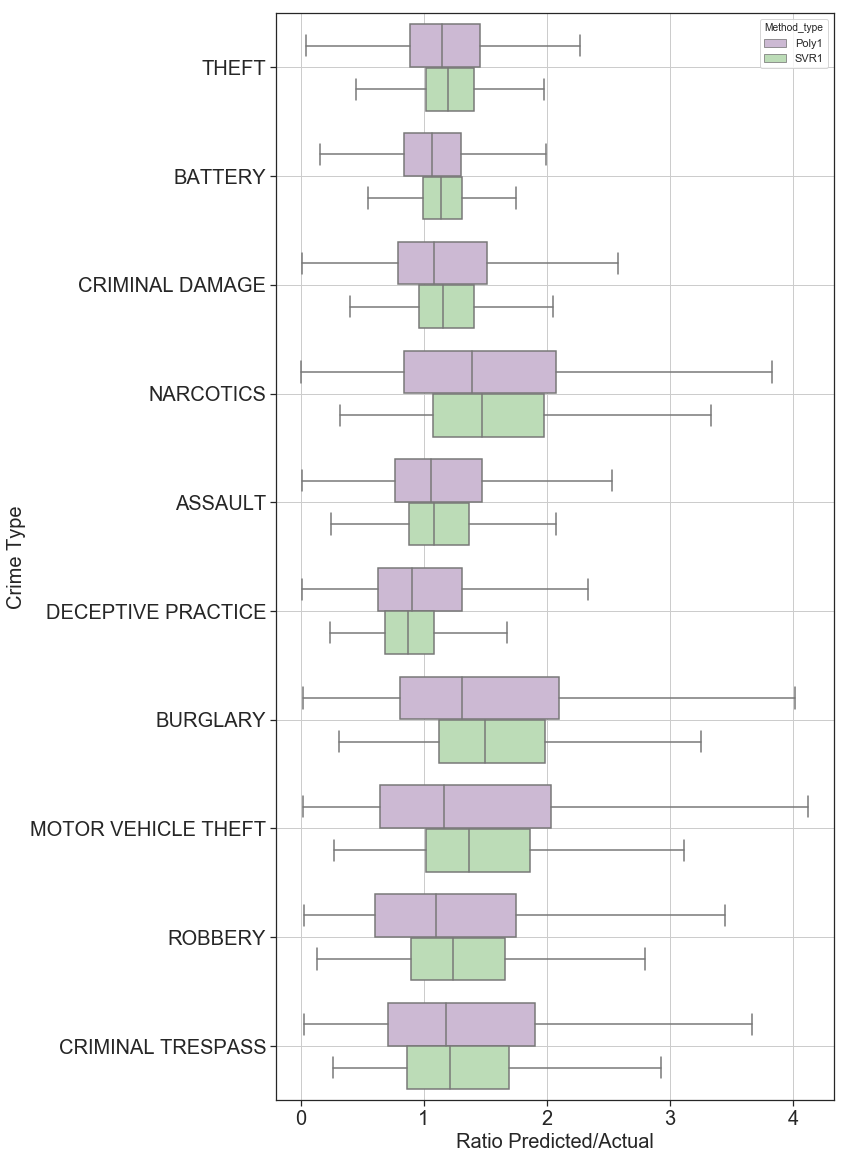

In [125]:
sns.set(style="ticks")

data_comm_1 = []
data_comm_1 = Predictions_df_error[(Predictions_df_error['Crime_Type'] == 'THEFT') ]
data_comm_1 = data_comm_1.append(Predictions_df_error[(Predictions_df_error['Crime_Type'] == 'BATTERY') ])
data_comm_1 = data_comm_1.append(Predictions_df_error[(Predictions_df_error['Crime_Type'] == 'CRIMINAL DAMAGE') ])
data_comm_1 = data_comm_1.append(Predictions_df_error[(Predictions_df_error['Crime_Type'] == 'NARCOTICS') ])
data_comm_1 = data_comm_1.append(Predictions_df_error[(Predictions_df_error['Crime_Type'] == 'ASSAULT') ])
data_comm_1 = data_comm_1.append(Predictions_df_error[(Predictions_df_error['Crime_Type'] == 'DECEPTIVE PRACTICE') ])
data_comm_1 = data_comm_1.append(Predictions_df_error[(Predictions_df_error['Crime_Type'] == 'BURGLARY') ])
data_comm_1 = data_comm_1.append(Predictions_df_error[(Predictions_df_error['Crime_Type'] == 'MOTOR VEHICLE THEFT') ])
data_comm_1 = data_comm_1.append(Predictions_df_error[(Predictions_df_error['Crime_Type'] == 'ROBBERY') ])
data_comm_1 = data_comm_1.append(Predictions_df_error[(Predictions_df_error['Crime_Type'] == 'CRIMINAL TRESPASS') ])

axs = plt.subplots(ncols=1,figsize=(10,20))

ax = sns.boxplot(x="Computed_Value", y="Crime_Type",data=data_comm_1,hue="Method_type",
            palette="PRGn", ax = axs[1],showfliers=False)

ax.set_xlabel("Ratio Predicted/Actual",size=20)
ax.set_ylabel("Crime Type",size=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(True)

## Seasonality

In [103]:
Predictions_df_svr = Predictions_df[Predictions_df.Method_type == 'SVR1']

In [104]:
Predictions_df_svr.head()

,Community_Num,Crime_Type,Date_Month,Method_type,Computed_Value,Actual_value,Predicted_Value
30492,0,ARSON,Jan,SVR1,0.613978,1.0,0.227956
30493,1,ARSON,Jan,SVR1,1.939150,0.0,0.939150
30494,2,ARSON,Jan,SVR1,1.000000,0.0,0.000000
30495,3,ARSON,Jan,SVR1,1.000000,0.0,0.000000
30496,4,ARSON,Jan,SVR1,1.000000,0.0,0.000000


In [105]:
Predictions_df_svr = Predictions_df_svr.replace(to_replace='Jan', value='01/2015')
Predictions_df_svr = Predictions_df_svr.replace(to_replace='Feb', value='02/2015',)
Predictions_df_svr = Predictions_df_svr.replace(to_replace='Mar', value='03/2015',)
Predictions_df_svr = Predictions_df_svr.replace(to_replace='Apr', value='04/2015',)
Predictions_df_svr = Predictions_df_svr.replace(to_replace='May', value='05/2015',)
Predictions_df_svr = Predictions_df_svr.replace(to_replace='Jun', value='06/2015',)
Predictions_df_svr = Predictions_df_svr.replace(to_replace='Jul', value='07/2015',)
Predictions_df_svr = Predictions_df_svr.replace(to_replace='Aug', value='08/2015',)
Predictions_df_svr = Predictions_df_svr.replace(to_replace='Sep', value='09/2015',)
Predictions_df_svr = Predictions_df_svr.replace(to_replace='Oct', value='10/2015',)
Predictions_df_svr = Predictions_df_svr.replace(to_replace='Nov', value='11/2015',)
Predictions_df_svr = Predictions_df_svr.replace(to_replace='Dec', value='12/2015',)

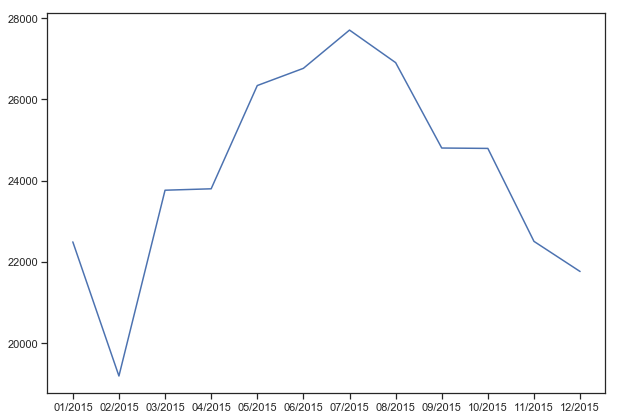

In [106]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(Predictions_df_svr.groupby('Date_Month').Predicted_Value.sum())
plt.show()

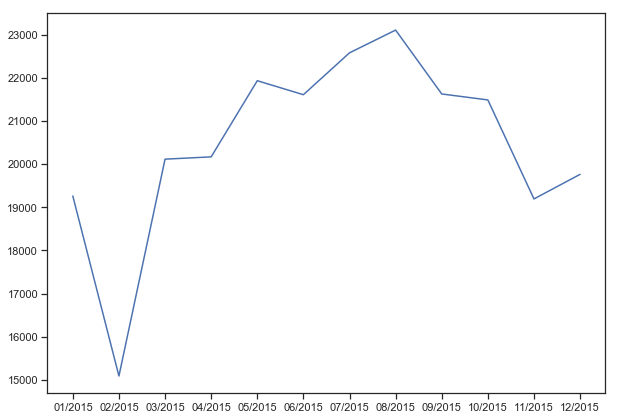

In [107]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(Predictions_df_svr.groupby('Date_Month').Actual_value.sum())
plt.show()

In [108]:
Predictions_df_svr_narcotics = Predictions_df_svr[Predictions_df_svr.Crime_Type == 'NARCOTICS']

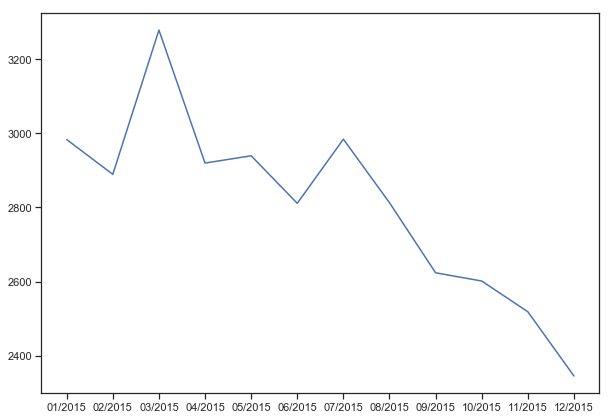

In [109]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(Predictions_df_svr_narcotics.groupby('Date_Month').Predicted_Value.sum())
plt.show()

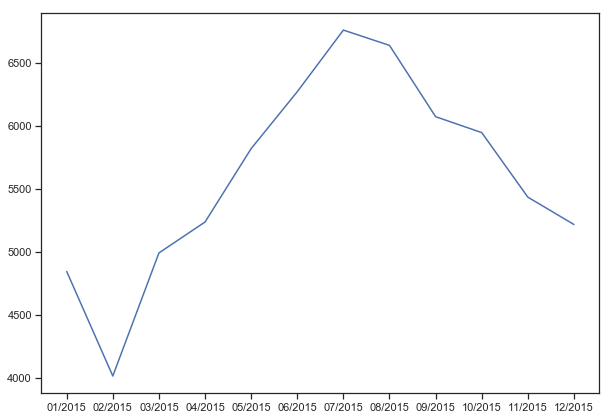

In [110]:
Predictions_df_svr_theft = Predictions_df_svr[Predictions_df_svr.Crime_Type == 'THEFT']
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(Predictions_df_svr_theft.groupby('Date_Month').Predicted_Value.sum())
plt.show()